In [1]:
import pandas_datareader as wb, pandas as pd, datetime, matplotlib.pyplot as plt, numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 6, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

### Nonlinar Models and Their Applications

Apart from the development of various nonlinear models, there is substantial interest in studying test statistics that can discriminate linear series from nonlinear ones. Both parametric and nonparametric tests are available. Most parametric tests employ either the Lagrange multiplier or likelihood ratio statistics. Nonparametric tests depend on either higher order spectra of $x_t$ or the concept of dimension correlation developed for chaotic time series.

#### 1. Nonlinear Models

Our goal here is to introduce some nonlinear models that are applicable to financial time series.

**1.1 Bilinear Model**

As such, a natural extension to nonlinearity is to employ the second-order terms in the expansion to improve the approximation. This is the basic idea of bilinear models, which can be defined as

$$x_t = c + \sum_{i=1}^p ϕ_i x_{t-i} - \sum_{j=i}^q θ_j a_{t-j} + \sum_{i=1}^m \sum_{j=1}^s β_{ij}x_{t-i}a_{t-j} + a_t$$

where $p,q,m$ and $s$ are nonnegative integers.

For example, consider the model

$$x_t = μ + ∑_{i=1}^s β_i a_{t-i}a_t + a_t$$

where $\{a_t\}$ is a white noise series. The first two conditional moments of $x_t$ are

$$E(x_t|F_{t-1}) = μ,~~~~~~ \mathrm{Var}(x_t|F_{t-1}) = \Big(1 + \sum_{i=1}^s \beta_i a_{t-i}\Big)^2 σ_a^2$$

which are similar to that of the RCA or CHARMA model of Chapter 3.

<Figure size 1000x800 with 0 Axes>

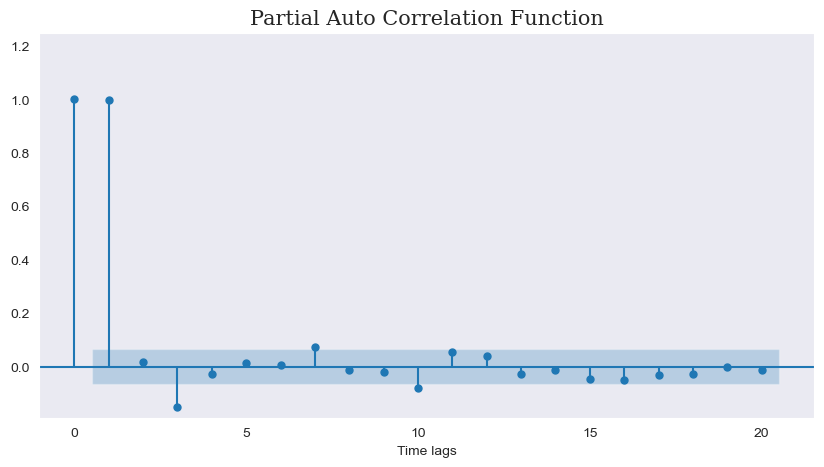

In [4]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(df), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

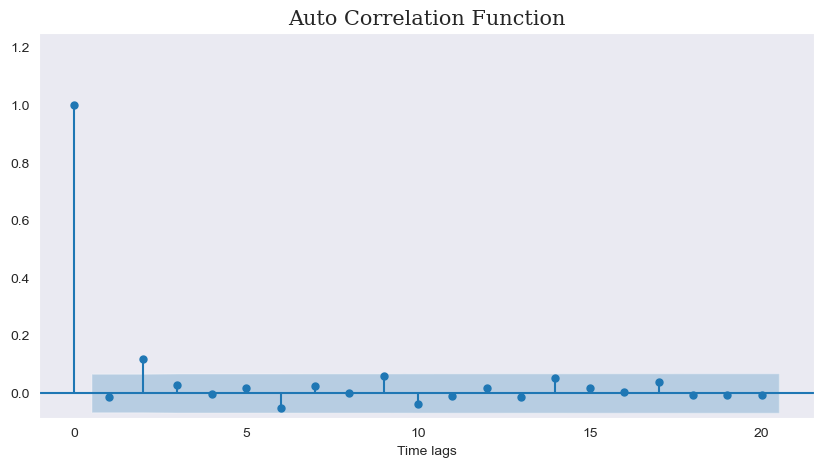

In [5]:
df_diff = (df - df.shift(1)) / df
df_diff = df_diff.dropna()

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_diff, auto_ylims = True, lags = 20, title = 'ACF of KOSPI return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

consider AR(3) model in KOSPI return series

In [6]:
import pandas as pd
import statsmodels.api as sm

model = sm.tsa.ARIMA(np.log(df), order = (3,0,0), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  865
Model:                 ARIMA(3, 0, 0)   Log Likelihood                2529.173
Date:                Mon, 03 Jul 2023   AIC                          -5048.346
Time:                        21:46:01   BIC                          -5024.533
Sample:                             0   HQIC                         -5039.232
                                - 865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8237      0.094     83.663      0.000       7.640       8.007
ar.L1          0.9826      0.015     67.273      0.000       0.954       1.011
ar.L2          0.1323      0.021      6.280      0.000       0.091       0.174
ar.L3         -0.1192      0.018     -6.743      0.000      -0.154      -0.085
sigma2         0.0002   4.19e-06     40.136      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1154.22
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
bilinear = pd.DataFrame(np.log(df))
bilinear['1'] = np.log(df).shift(1)
bilinear['2'] = np.log(df).shift(2)
bilinear['3'] = np.log(df).shift(3)
bilinear.columns = ['log_price','ar_1','ar_2','ar_3']
bilinear = bilinear.dropna()

In [8]:
X = bilinear.iloc[:, 1:]
y = bilinear.iloc[:, 0]
X = sm.add_constant(X)

model = sm.OLS(y, X)
ARModel = model.fit()

ARModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.110e+04
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:46:07   Log-Likelihood:                 2522.3
No. Observations:                 862   AIC:                            -5037.
Df Residuals:                     858   BIC:                            -5018.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0358      0.022      1.604      0.109      -0.008       0.080
ar_1           0.9822      0.034     28.987      0.000       0.916       1.049
ar_2           0.1324      0.047      2.790      0.005       0.039       0.226
ar_3          -0.1192      0.034     -3.520      0.000      -0.186      -0.053
==============================================================================
Omnibus:                      117.573   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.603
Skew:                          -0.194   Prob(JB):                    8.56e-251
Kurtosis:                       8.649   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
a = ARModel.resid
bilinear['noise'] = a
bilinear['noise_1'] = a * a.shift(1)
bilinear['noise_2'] = a * a.shift(2)
bilinear['noise_3'] = a * a.shift(3)
bilinear = bilinear.dropna()
bilinear

,log_price,ar_1,ar_2,ar_3,noise,noise_1,noise_2,noise_3
Date,,,,,,,,
2020-01-10,7.699113,7.690035,7.673832,7.685032,0.009717,0.000135,-0.000105,0.000080
2020-01-13,7.709425,7.699113,7.690035,7.673832,0.007631,0.000074,0.000106,-0.000083
2020-01-14,7.713731,7.709425,7.699113,7.690035,0.002537,0.000019,0.000025,0.000035
2020-01-15,7.710196,7.713731,7.709425,7.699113,-0.005511,-0.000014,-0.000042,-0.000054
2020-01-16,7.717818,7.710196,7.713731,7.709425,0.006242,-0.000034,0.000016,0.000048
...,...,...,...,...,...,...,...,...
2023-06-26,7.856397,7.851700,7.860841,7.856564,0.003888,-0.000032,0.000016,-0.000031
2023-06-27,7.856083,7.856397,7.851700,7.860841,0.000681,0.000003,-0.000006,0.000003
2023-06-28,7.849398,7.856083,7.856397,7.851700,-0.007408,-0.000005,-0.000029,0.000061


In [10]:
X = bilinear.iloc[:, 1:]
y = bilinear.iloc[:, 0]
X = sm.add_constant(X)

model = sm.OLS(y, X)
BiLinear = model.fit()

print(BiLinear.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.334e+25
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:46:14   Log-Likelihood:                 23557.
No. Observations:                 859   AIC:                        -4.710e+04
Df Residuals:                     851   BIC:                        -4.706e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0358   5.21e-13   6.87e+10      0.0

KOSPI index에 대해 Bilinear Time Series Model 적합화 결과 다음과 같은 모델이 나왔다

$$r_t = 0.0358 + 0.9822r_{t-1} + 0.1324 r_{t-2} - 0.1192r_{t-3} + (1 + 1.137 \times 10^{-12} a_{t-1} - 1.592 \times 10^{-12}a_{t-2} - 3.979 \times 10^{-13}a_{t-3})a_t$$

In [15]:
ARModel.resid

Date
2020-01-07    0.008276
2020-01-08   -0.010832
2020-01-09    0.013943
2020-01-10    0.009717
2020-01-13    0.007631
                ...   
2023-06-26    0.003888
2023-06-27    0.000681
2023-06-28   -0.007408
2023-06-29   -0.005782
2023-06-30    0.006086
Length: 862, dtype: float64

In [32]:
BiLinear.resid

Date
2020-01-10    2.904343e-13
2020-01-13    2.930989e-13
2020-01-14    2.930989e-13
2020-01-15    2.922107e-13
2020-01-16    2.922107e-13
                  ...     
2023-06-26    2.984279e-13
2023-06-27    2.966516e-13
2023-06-28    2.984279e-13
2023-06-29    2.984279e-13
2023-06-30    2.984279e-13
Length: 859, dtype: float64

모델 잔차 확인 결과 Bilinear Model이 더 작은 것을 확인할 수 있다

**1.2 Treshold Autoregressive(TAR) Model**

This model is motivated by several nonlinear characteristics commonly observed in practice such as asymmetry in declining and rising patterns of a process. It uses piecewise linear models to obtain a better approximation of the conditional mean equation. However, in contrast to the traditional piecewise linear model that allows for model changes to occur in the time space, the TAR model uses threshold space to improve linear approximation.
Let us start with a simple 2-regime AR(1) Model

$$x_t=
\begin{cases}
-1.5x_{t-1} + a_t~, & \mbox{if }x_{t-1} < 0, \\
0.5x_{t-1} + a_t~~, & \mbox{if }x_{t-1}\leq 0
\end{cases}$$

where the $a_t$ is iid $N(0,1)$

In [44]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 6, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

In [45]:
df = pd.DataFrame(df)

In [46]:
threshold = 0
df['ret'] = np.log(df['Close']) - np.log(df['Close'].shift())
regime = np.where(df['ret'] > threshold, 1, 0)
df['regime'] = regime
df = df.dropna()

In [63]:
df[df.regime == 0]

,Close,ret,regime
Date,,,
2020-01-06,2155.07,-0.009876,0
2020-01-08,2151.31,-0.011200,0
2020-01-15,2230.98,-0.003535,0
2020-01-21,2239.69,-0.010195,0
2020-01-23,2246.13,-0.009359,0
...,...,...,...
2023-06-21,2582.63,-0.008590,0
2023-06-23,2570.10,-0.009141,0
2023-06-27,2581.39,-0.000314,0


<Figure size 1000x800 with 0 Axes>

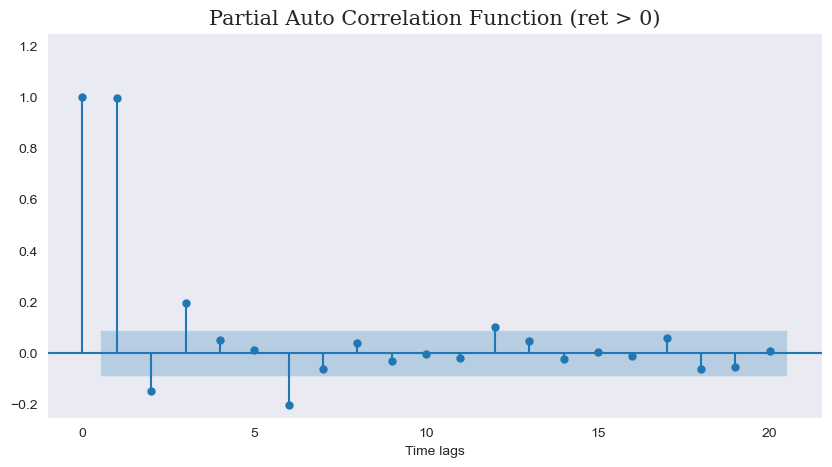

In [54]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(df[df.regime == 1]['Close']), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index (ret > 0)', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function (ret > 0)', fontsize = 15, fontfamily = 'Serif')
plt.show()

<Figure size 1000x800 with 0 Axes>

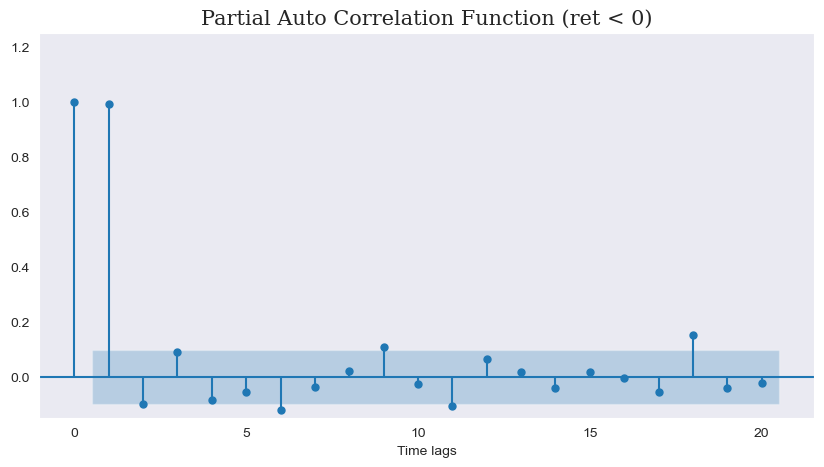

In [55]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(np.log(df[df.regime == 0]['Close']), auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Partial Auto Correlation Function (ret < 0)', fontsize = 15, fontfamily = 'Serif')
plt.show()

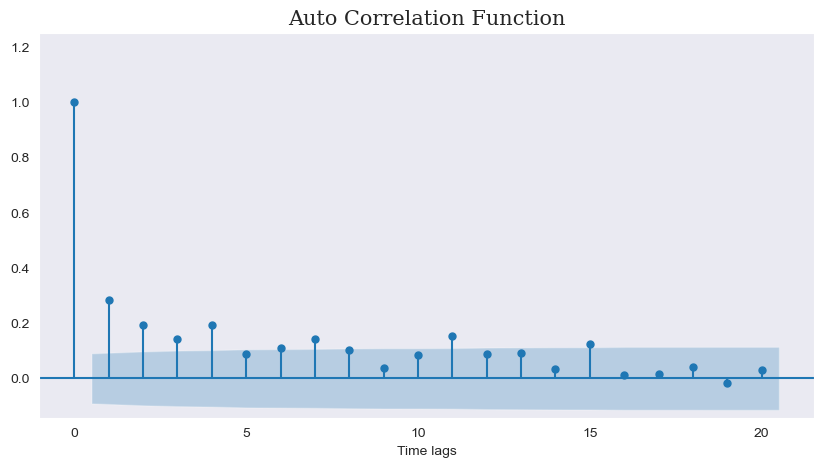

In [65]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df[df.regime == 1]['ret'], auto_ylims = True, lags = 20, title = 'ACF of KOSPI return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('Auto Correlation Function', fontsize = 15, fontfamily = 'Serif')
plt.show()

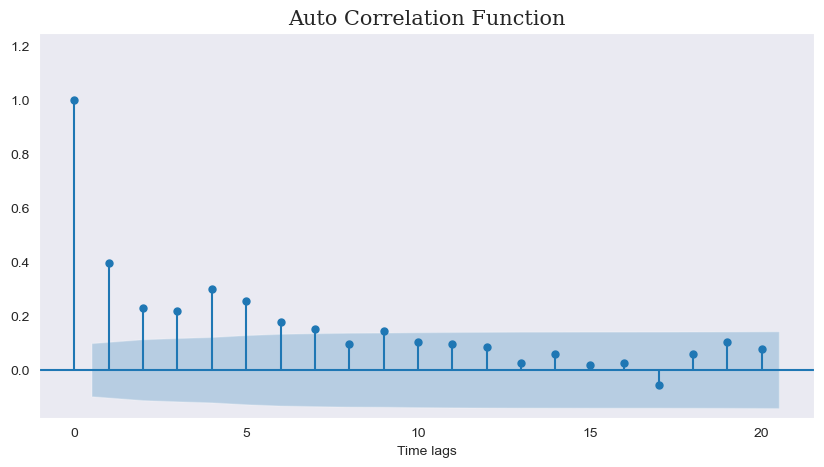

In [66]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df[df.regime == 0]['ret'], auto_ylims=True, lags=20, title='ACF of KOSPI return', ax=ax)
plt.xlabel('Time lags', fontsize=10)
plt.title('Auto Correlation Function', fontsize=15, fontfamily='Serif')
plt.show()

In [67]:
df

,Close,ret,regime
Date,,,
2020-01-03,2176.46,0.000593,1
2020-01-06,2155.07,-0.009876,0
2020-01-07,2175.54,0.009454,1
2020-01-08,2151.31,-0.011200,0
2020-01-09,2186.45,0.016202,1
...,...,...,...
2023-06-26,2582.20,0.004697,1
2023-06-27,2581.39,-0.000314,0
2023-06-28,2564.19,-0.006685,0
